In [3]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)
# 과일 데이터 사진을 가져와서 넘파이 배열로 적재

--2023-07-11 08:45:34--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-07-11 08:45:34--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-07-11 08:45:35--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [4]:
from sklearn.decomposition import PCA # sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공
pca = PCA(n_components=50) # 객체생성(주성분의 수 입력)
pca.fit(fruits_2d) # 비지도 학습은 타깃값을 제공하지 않음

PCA(n_components=50)

In [5]:
print(pca.components_.shape) # 알고리즘이 찾은 주성분은 components_ 속성에 저장되어 있음
# (주성분의 수, 원본데이터의 수)

(50, 10000)


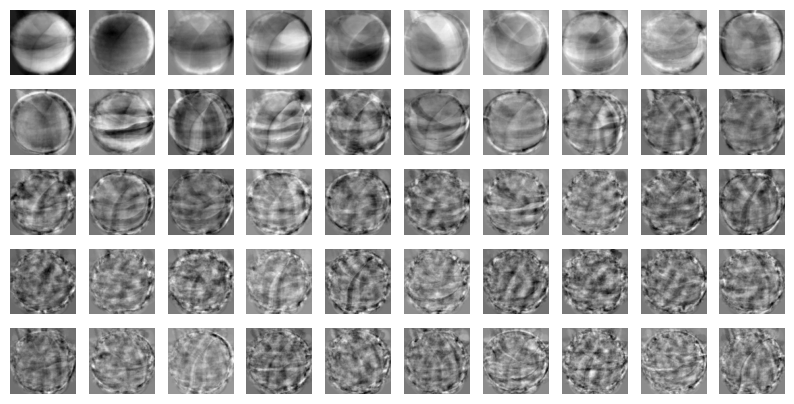

In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10 + j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

draw_fruits(pca.components_.reshape(-1,100,100)) # 50개의 주성분을 그림으로 그려보기

In [7]:
# 원본 데이터의 차원을 transform()메서드를 사용하여 50으로 줄여보기
print('차원줄이기전',fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print('차원줄인후',fruits_pca.shape)
# (300개의 데이터, 각 데이터 별 특성의 수)

차원줄이기전 (300, 10000)
차원줄인후 (300, 50)


In [8]:
# 원본데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


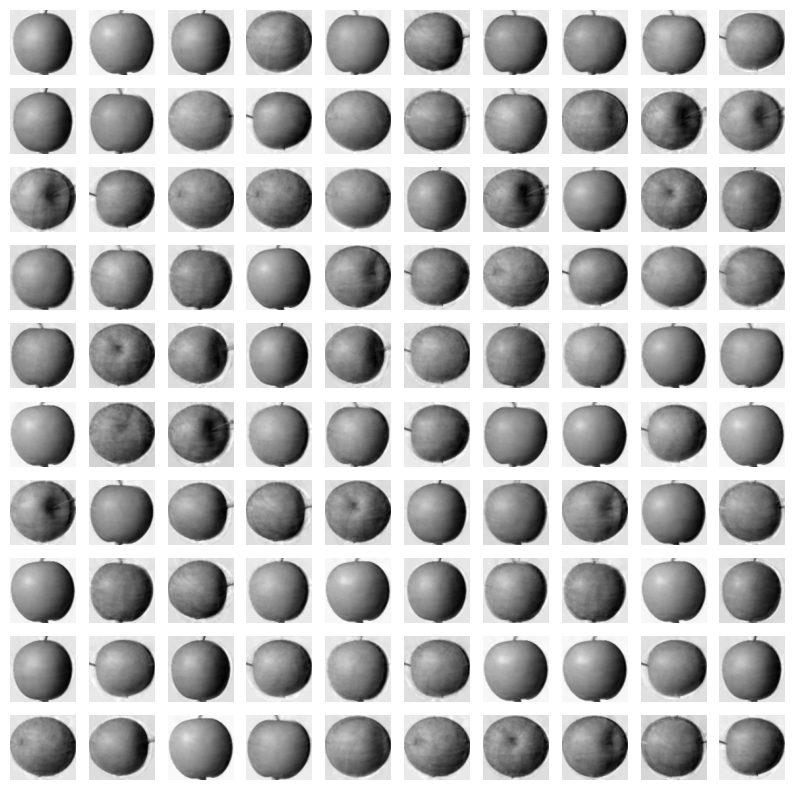

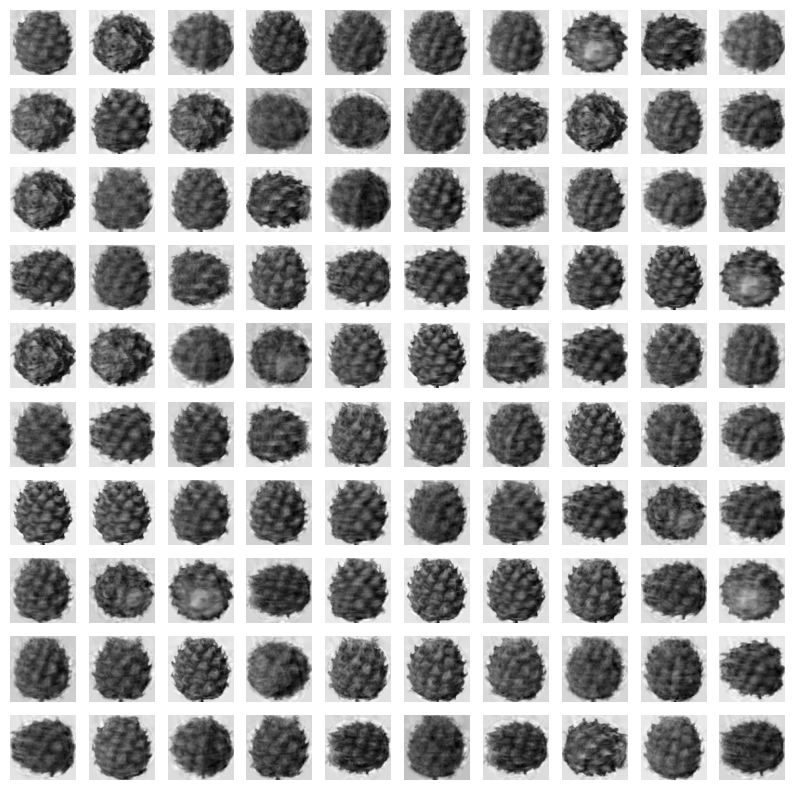

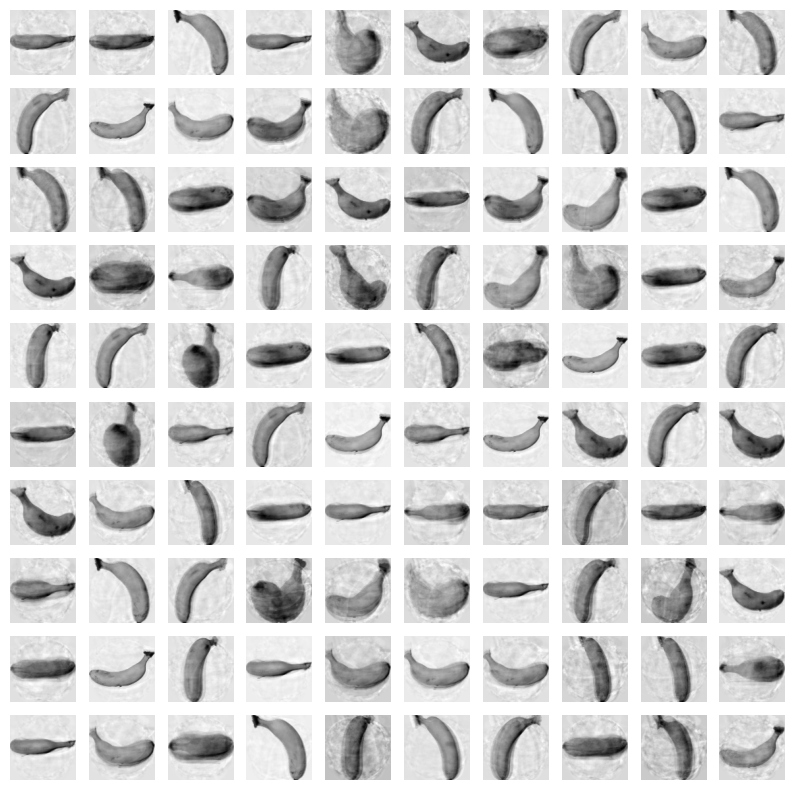

In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print()

In [10]:
# 설명된 분산 : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
# PCA 클래스의 explained_variance_ratio_ 에 각 주성분의 설명된 분산 비율이 기록되어 있다.
print(np.sum(pca.explained_variance_ratio_)) # 각 주성분의 설명된 분산을 모두 더한 값

0.9215479654924483


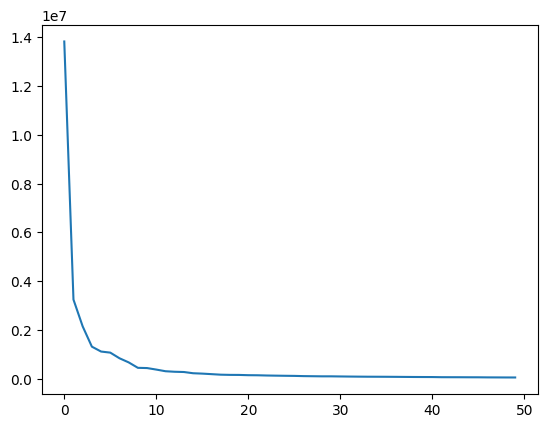

In [11]:
# (가로: 각 주성분, 세로: 설명된 분산)
plt.plot(pca.explained_variance_) # 처음 10개의 주성분이 대부분의 분산을 표현하고 있음
plt.show()

In [39]:
# 다른 알고리즘과 함께 사용하기
# 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 알아보기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [40]:
target = np.array([0]*100 + [1]*100 + [2]*100) # 타깃값 만들기

In [41]:
# 교차검증으로 성능 평가
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 원본데이터의 정확도와 검증폴드의 훈련시간

0.9966666666666667
2.289918041229248


In [42]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 차원축소한 데이터
# 원본데이터보다 과대적합이 적어서 정확도가 올라감, 특성 개수 줄어서 훈련시간도 줄어듬

0.9933333333333334
0.04265189170837402


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [43]:
# 주성분의 개수 대신 설명된 분산의 비율로 입력하기(50%에 달하는 주성분을 찾도록 함)
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)
# n_components 는 비율이고 뒤에 _를 추가하면 주성분의 개수
# 2개의 특성으로 원본의 50%를 표현가능

2


In [44]:
# 원본변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [45]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # lr의 max_iter을 늘려서 오류를 해결
# 2개의 특성으로 높은 정확도를 달성

0.9933333333333334
0.04459037780761719


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [46]:
# 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


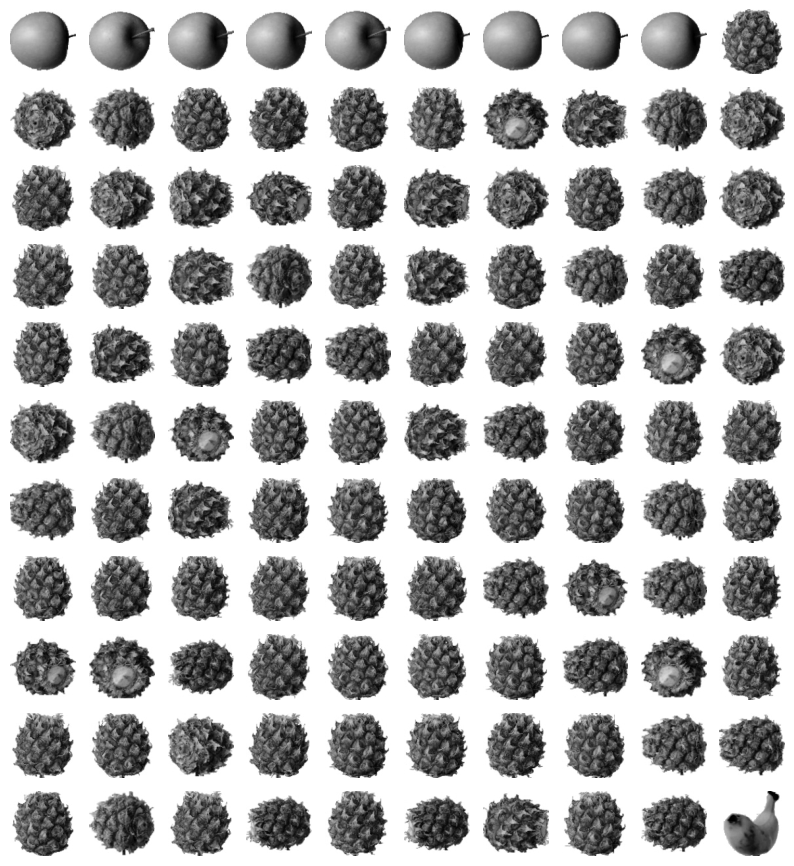

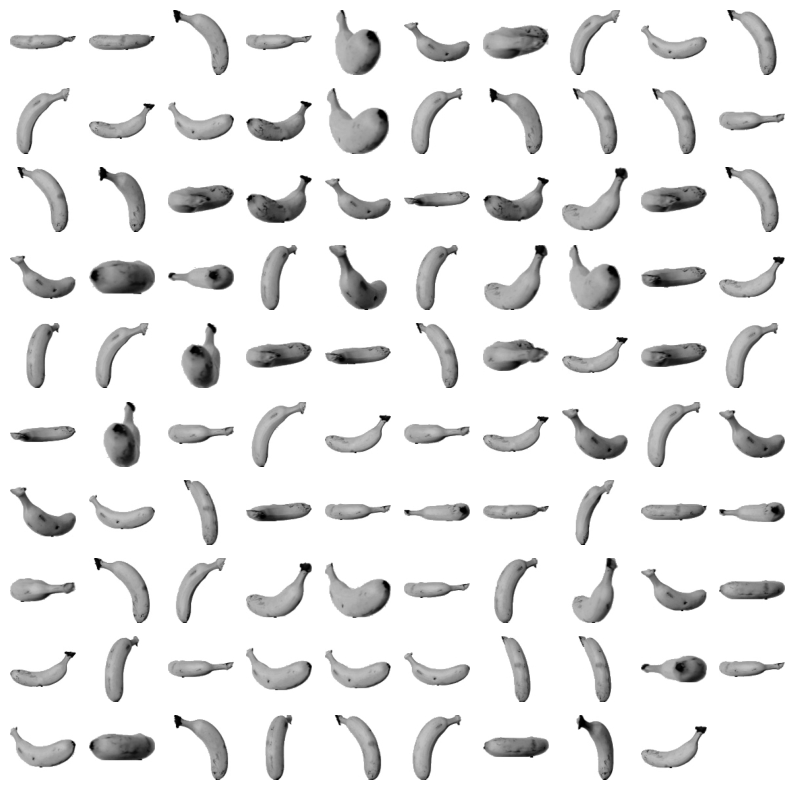

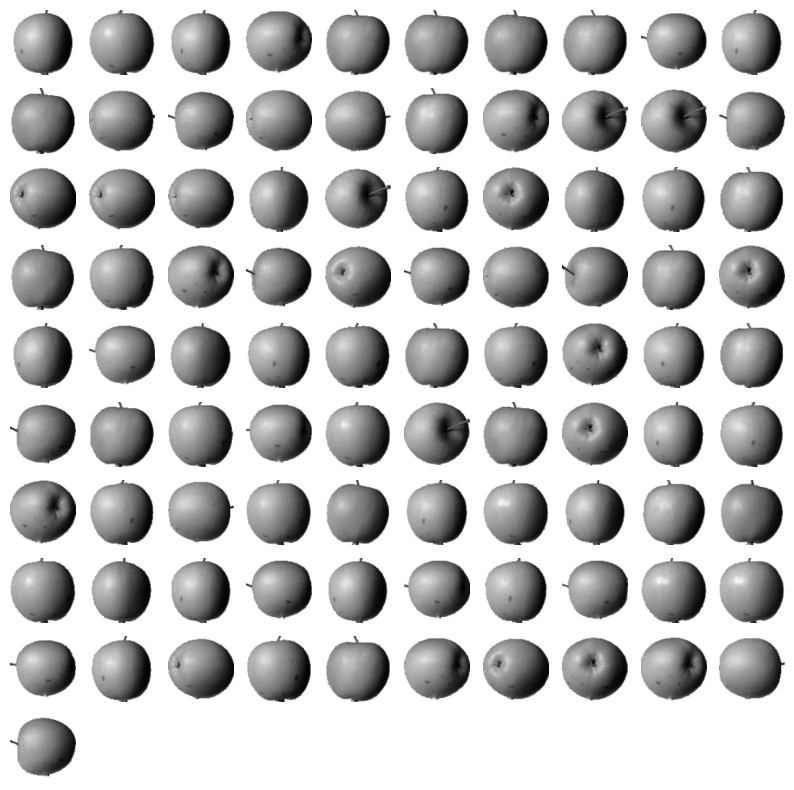

In [47]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print()

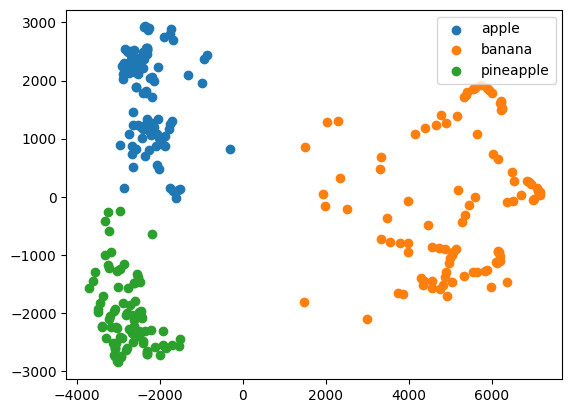

In [48]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()
# 각 축은 주성분(특성의 개수)